In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## seaborn 画图思想
- seaborn 和matplotlib的区别在于 seaborn 更倾向于快速的画图 对 matplot lib中大量的精细的函数直接做了组合
- 可以直接使用pd.DataFrame中的不同的列对数据进行不同维度上的分组

### realplot 点图 (scatter plot)
试图使用不同的图形特征来在一张图中表示多个维度的数据
参数: 
1. x 作为x轴的列 
2. y 作为y轴的列
3. hue 颜色分组 使用hue指定的列将数据分为多组
4. style 点的风格分组
5. size 点的大小分组 
6. col 使用subplot多图模式的分组列
7. row 使用subplot多图模式的分组行

In [5]:
sns.set()
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


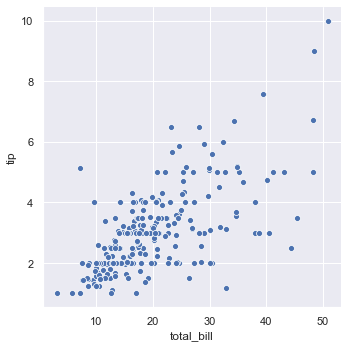

In [6]:
sns.relplot(x="total_bill", y="tip", data=tips)

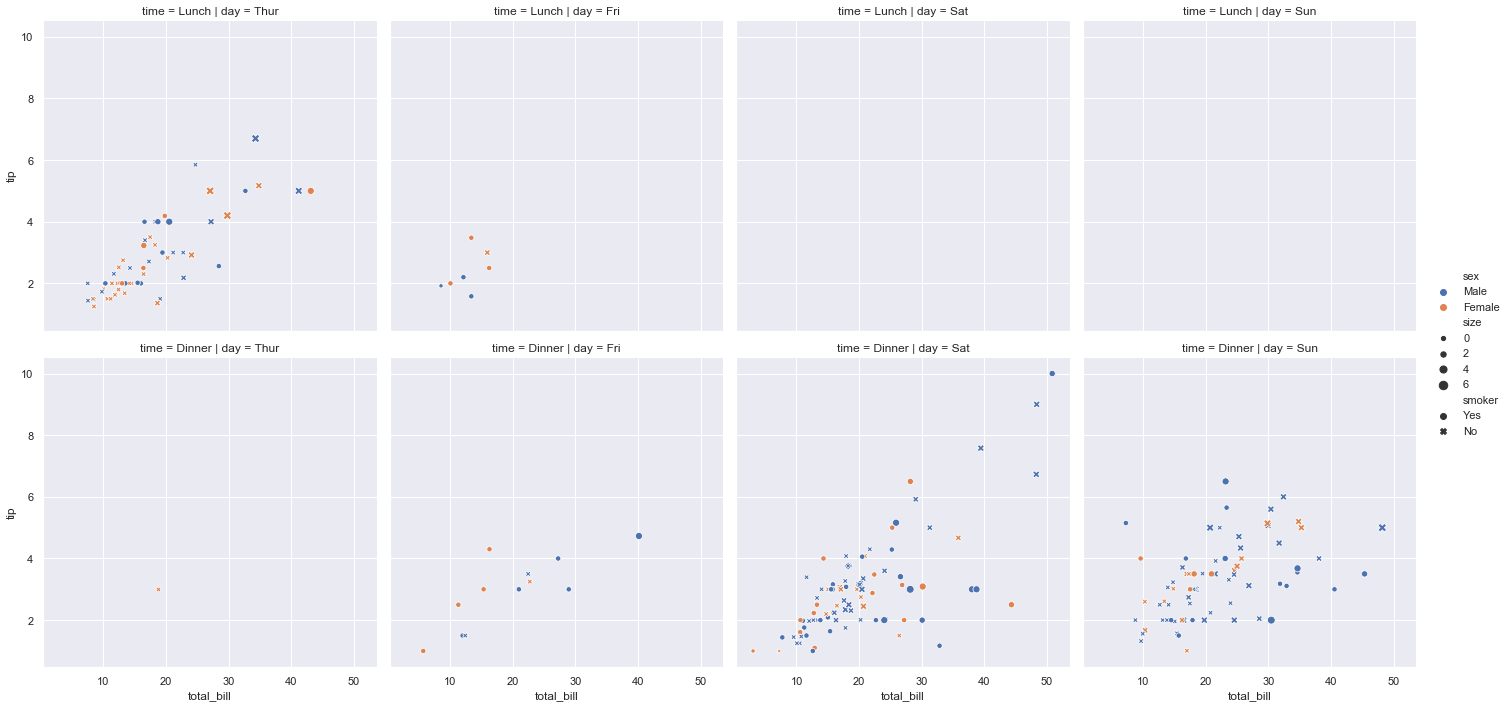

In [9]:
# 使用多个维度 画出多个特征的组合图
sns.relplot(x="total_bill", y="tip", hue='sex', style='smoker', size='size', row="time", col="day", data=tips)

### realplot 线图(line plot)
使用线使用不同的图形特征来在一张图中表示多个维度的数据
参数: 
1. x 作为x轴的列 
2. y 作为y轴的列
3. hue 颜色分组 使用hue指定的列将数据分为多组
4. style 线的风格分组
5. size 线的粗细分组 
6. col 使用subplot多图模式的分组列
7. row 使用subplot多图模式的分组行

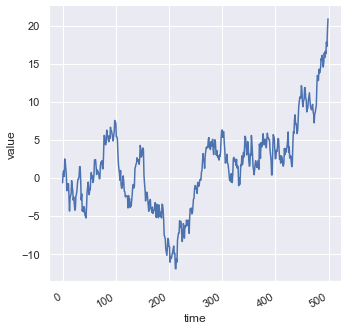

In [19]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() #防止x坐标轴的标注重叠 所以对结果进行旋转

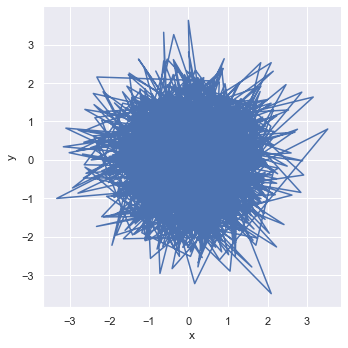

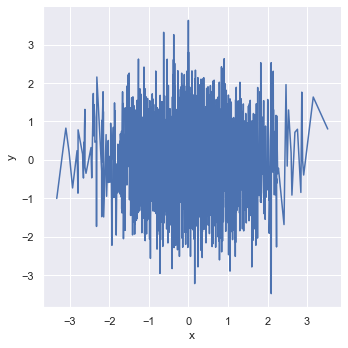

In [37]:
# 画line图的时候 一般横轴x是时间 所以会默认对 (x,y)数据对按照x从小到大的顺序进行排序
dt = np.random.randn(2000, 2)
df = pd.DataFrame({"x": dt[:, 0], "y": dt[:, 1]})
# 不排序画出的上图 可以认为是一个路径的图像 matplotlib 默认是 不排序的
g = sns.relplot(x="x", y="y", kind="line", sort=False, data=df) 

# 排序画出的下图 可以认为是一个时间的图像 
g = sns.relplot(x="x", y="y", kind="line", data=df)

#### 线图 画出聚合值和误差范围
如果在同一时间有多个观测数据 那么可以画出她的平均值 最大值 最小值等

In [33]:
fmri = sns.load_dataset("fmri")
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


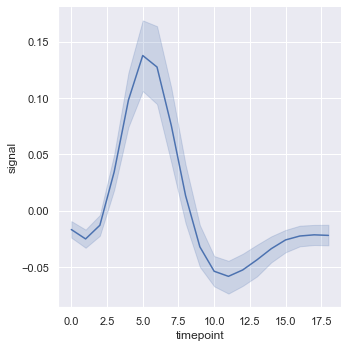

In [36]:
# 默认带有置信区间
# 使用不同的ci 关键词参数可以操作置信区间
# ci="sd" standard deviation 标准差
# ci=None 不显示任何区间
# ci 默认为95%置信区间
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

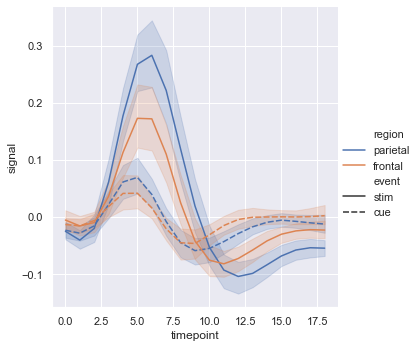

In [51]:
# 使用不同的列对数据进行不同层次维度上的分割 表现数据的多个维度
# 默认使用虚线实线的方案
sns.relplot(x="timepoint", y="signal", hue='region', style='event', kind="line", data=fmri)

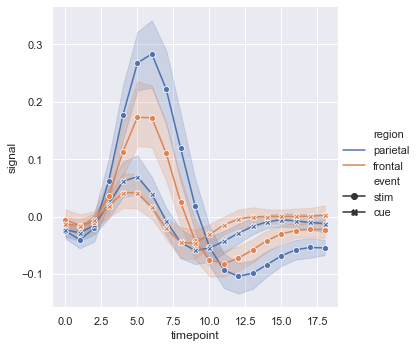

In [53]:
# 使用不同的列对数据进行不同层次维度上的分割 表现数据的多个维度
# dashes=False, markers=True 表示不使用虚线实线 而是使用点的形状来区分 style
sns.relplot(x="timepoint", y="signal", hue='region', style='event', dashes=False, markers=True, kind="line", data=fmri)

#### 线图 hue的数值类型和catgory类型
- hue的表现结果根据 hue对应列是连续数值类型还是 离散的类目类型有所不同
- 也存在 hue当前的颜色 表示在数据的线性空间上是不够用的 可能需要将颜色的变化映射到数据的对数尺度上

In [64]:
dots = sns.load_dataset("dots")

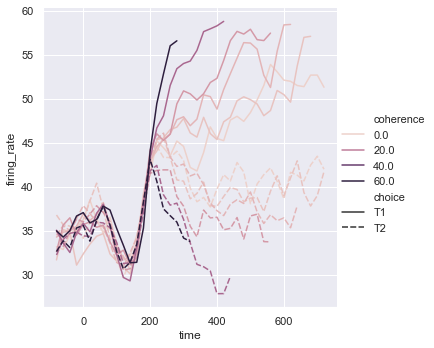

In [76]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots.query("align=='dots'"));


In [82]:
dots.query("align != 'dots'")

(454,)

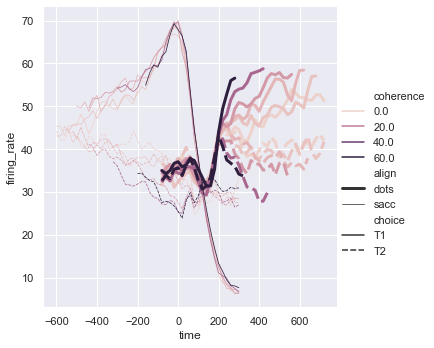

In [86]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            size="align", kind="line", data=dots);